In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
data = pd.read_csv('Global_YouTube_Statistics.csv', encoding='CP866')
data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


### Задание 1. EDA
Проведите разведывательный анализ данных (EDA).

Задайте не менее 6 вопросов к данным и постарайтесь ответить на них, используя визуализацию.
Изобразите матрицу корреляций для нахождения взаимосвязей.

In [4]:
# Основная информация о наборе данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [5]:
# Определим базовые статистические показатели и построим визуализации
# для понимания распределения и взаимосвязей между данными

data.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


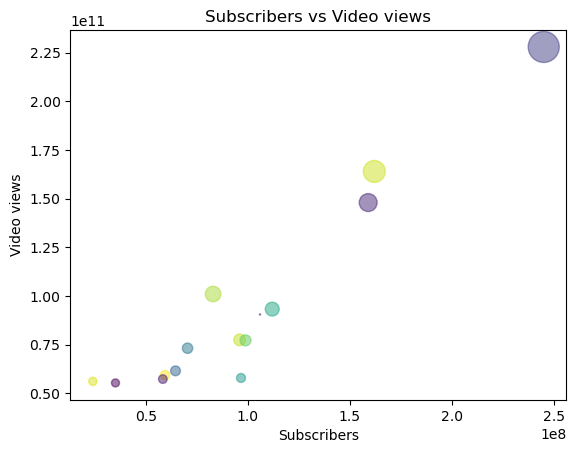

In [159]:
# Как взаимосвязаны просмотры и число подписчиков?

data_subscribers = data[['subscribers', 'video views', 'video_views_rank']].sort_values(by='video views', ascending=False).head(15)
x = data_subscribers['subscribers']
y = data_subscribers['video views']
N = len(data_subscribers['subscribers'])
colors = np.random.rand(N)
area = 500 / data_subscribers['video_views_rank']

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Subscribers vs Video views')
plt.xlabel('Subscribers')
plt.ylabel('Video views')
plt.show()

In [75]:
# video_views_rank некорректный столбец 

data[['subscribers', 'video views', 'video_views_rank']].sort_values(by='video views', ascending=False).head(6)

,subscribers,video views,video_views_rank
0,245000000,2.280000e+11,1.0
3,162000000,1.640000e+11,2.0
4,159000000,1.480000e+11,3.0
15,83000000,1.010000e+11,4.0
6,112000000,9.324704e+10,5.0
8,106000000,9.047906e+10,630.0


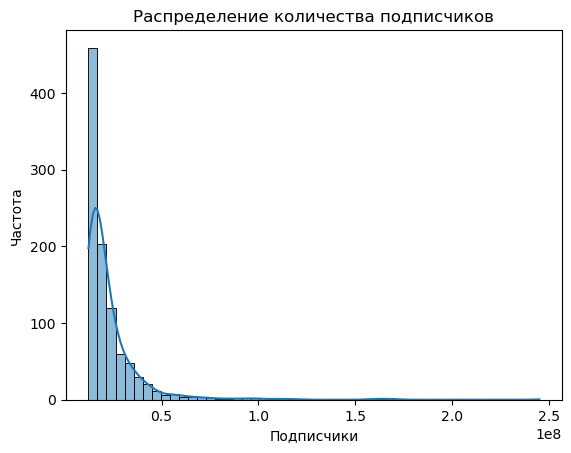

'Медианное значение по количеству подписчиков - 17 700 000.0'

In [22]:
# Как выглядит распределение количества подписчиков в рассматриваемом датасете?

sns.histplot(data['subscribers'], bins=50, kde=True)
plt.title('Распределение количества подписчиков')
plt.xlabel('Подписчики')
plt.ylabel('Частота')
plt.show()

'Медианное значение по количеству подписчиков - {0:,}'.format(data['subscribers'].median()).replace(',', ' ')

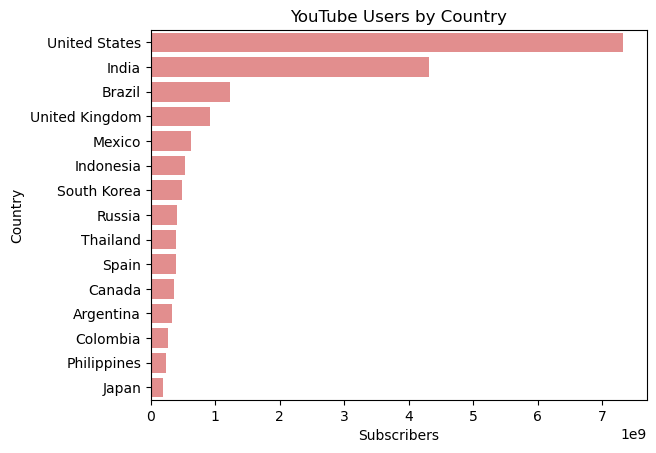

In [21]:
# На каналы какой страны подписано большее число людей?

data_subscribers = data.groupby(['Country'])['subscribers'].sum().reset_index().sort_values(by='subscribers', ascending=False)
top10_Users = data_subscribers.head(15)
sns.barplot(data=top10_Users, x='subscribers', y='Country', color='#F08080')
plt.title('YouTube Users by Country')
plt.xlabel('Subscribers')
plt.ylabel('Country')
plt.show()

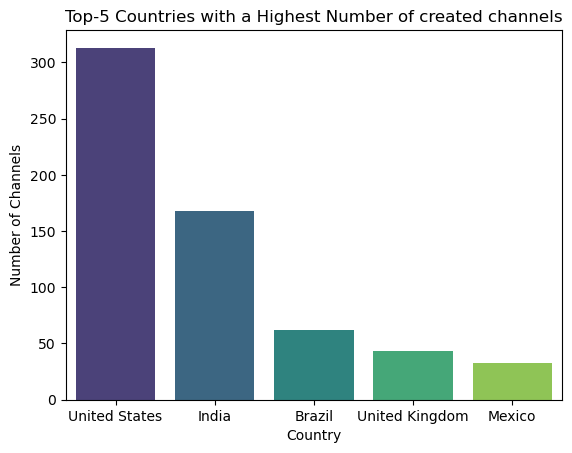

In [25]:
# В какой стране было создано наибольшее число ютуб-каналов?

top5_countries = data['Country'].value_counts().head(5)
sns.barplot(x=top5_countries.index, y=top5_countries.values, palette='viridis')
plt.title('Top-5 Countries with a Highest Number of created channels')
plt.xlabel('Country')
plt.ylabel('Number of Channels')
plt.show()

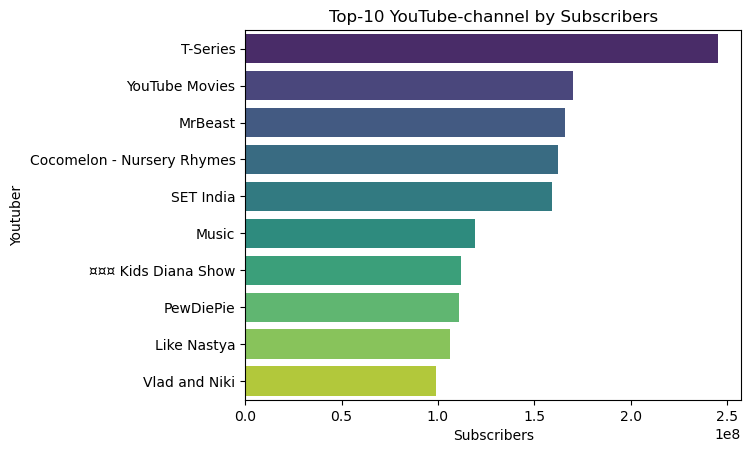

In [29]:
# Какой ютуб-канал лидирует по количеству подписчиков?

top10_YouTubers = data.nlargest(10, 'subscribers')
sns.barplot(data=top10_YouTubers, x='subscribers', y='Youtuber', palette='viridis')
plt.title('Top-10 YouTube-channel by Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Youtuber')
plt.show()

In [27]:
# Как различается годовой доход в зависимости от категории?

data_category = data.groupby(['category'])['lowest_yearly_earnings', 'highest_yearly_earnings'].sum().reset_index()
data_category.head()

/var/folders/y4/m_h08_mx5632hfk34wzwpt4c0000gn/T/ipykernel_2178/1257351708.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_category = data.groupby(['category'])['lowest_yearly_earnings', 'highest_yearly_earnings'].sum().reset_index()


,category,lowest_yearly_earnings,highest_yearly_earnings
0,Autos & Vehicles,1.679500e+06,2.630000e+07
1,Comedy,3.456668e+07,5.546650e+08
2,Education,2.337690e+07,3.745976e+08
3,Entertainment,1.125140e+08,1.803635e+09
4,Film & Animation,2.517046e+07,4.046887e+08


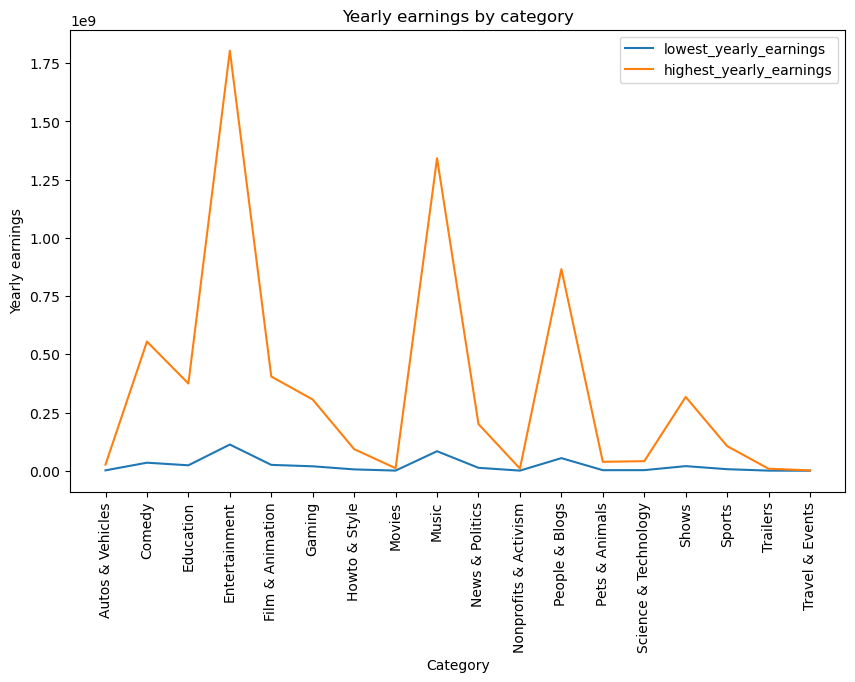

In [32]:
plt.figure(figsize=(10,6))
x = data_category['category']
y = data_category[['lowest_yearly_earnings', 'highest_yearly_earnings']]
plt.xticks(rotation=90)
plt.plot(x, y)
plt.title('Yearly earnings by category')
plt.xlabel('Category')
plt.ylabel('Yearly earnings')
plt.legend(y)

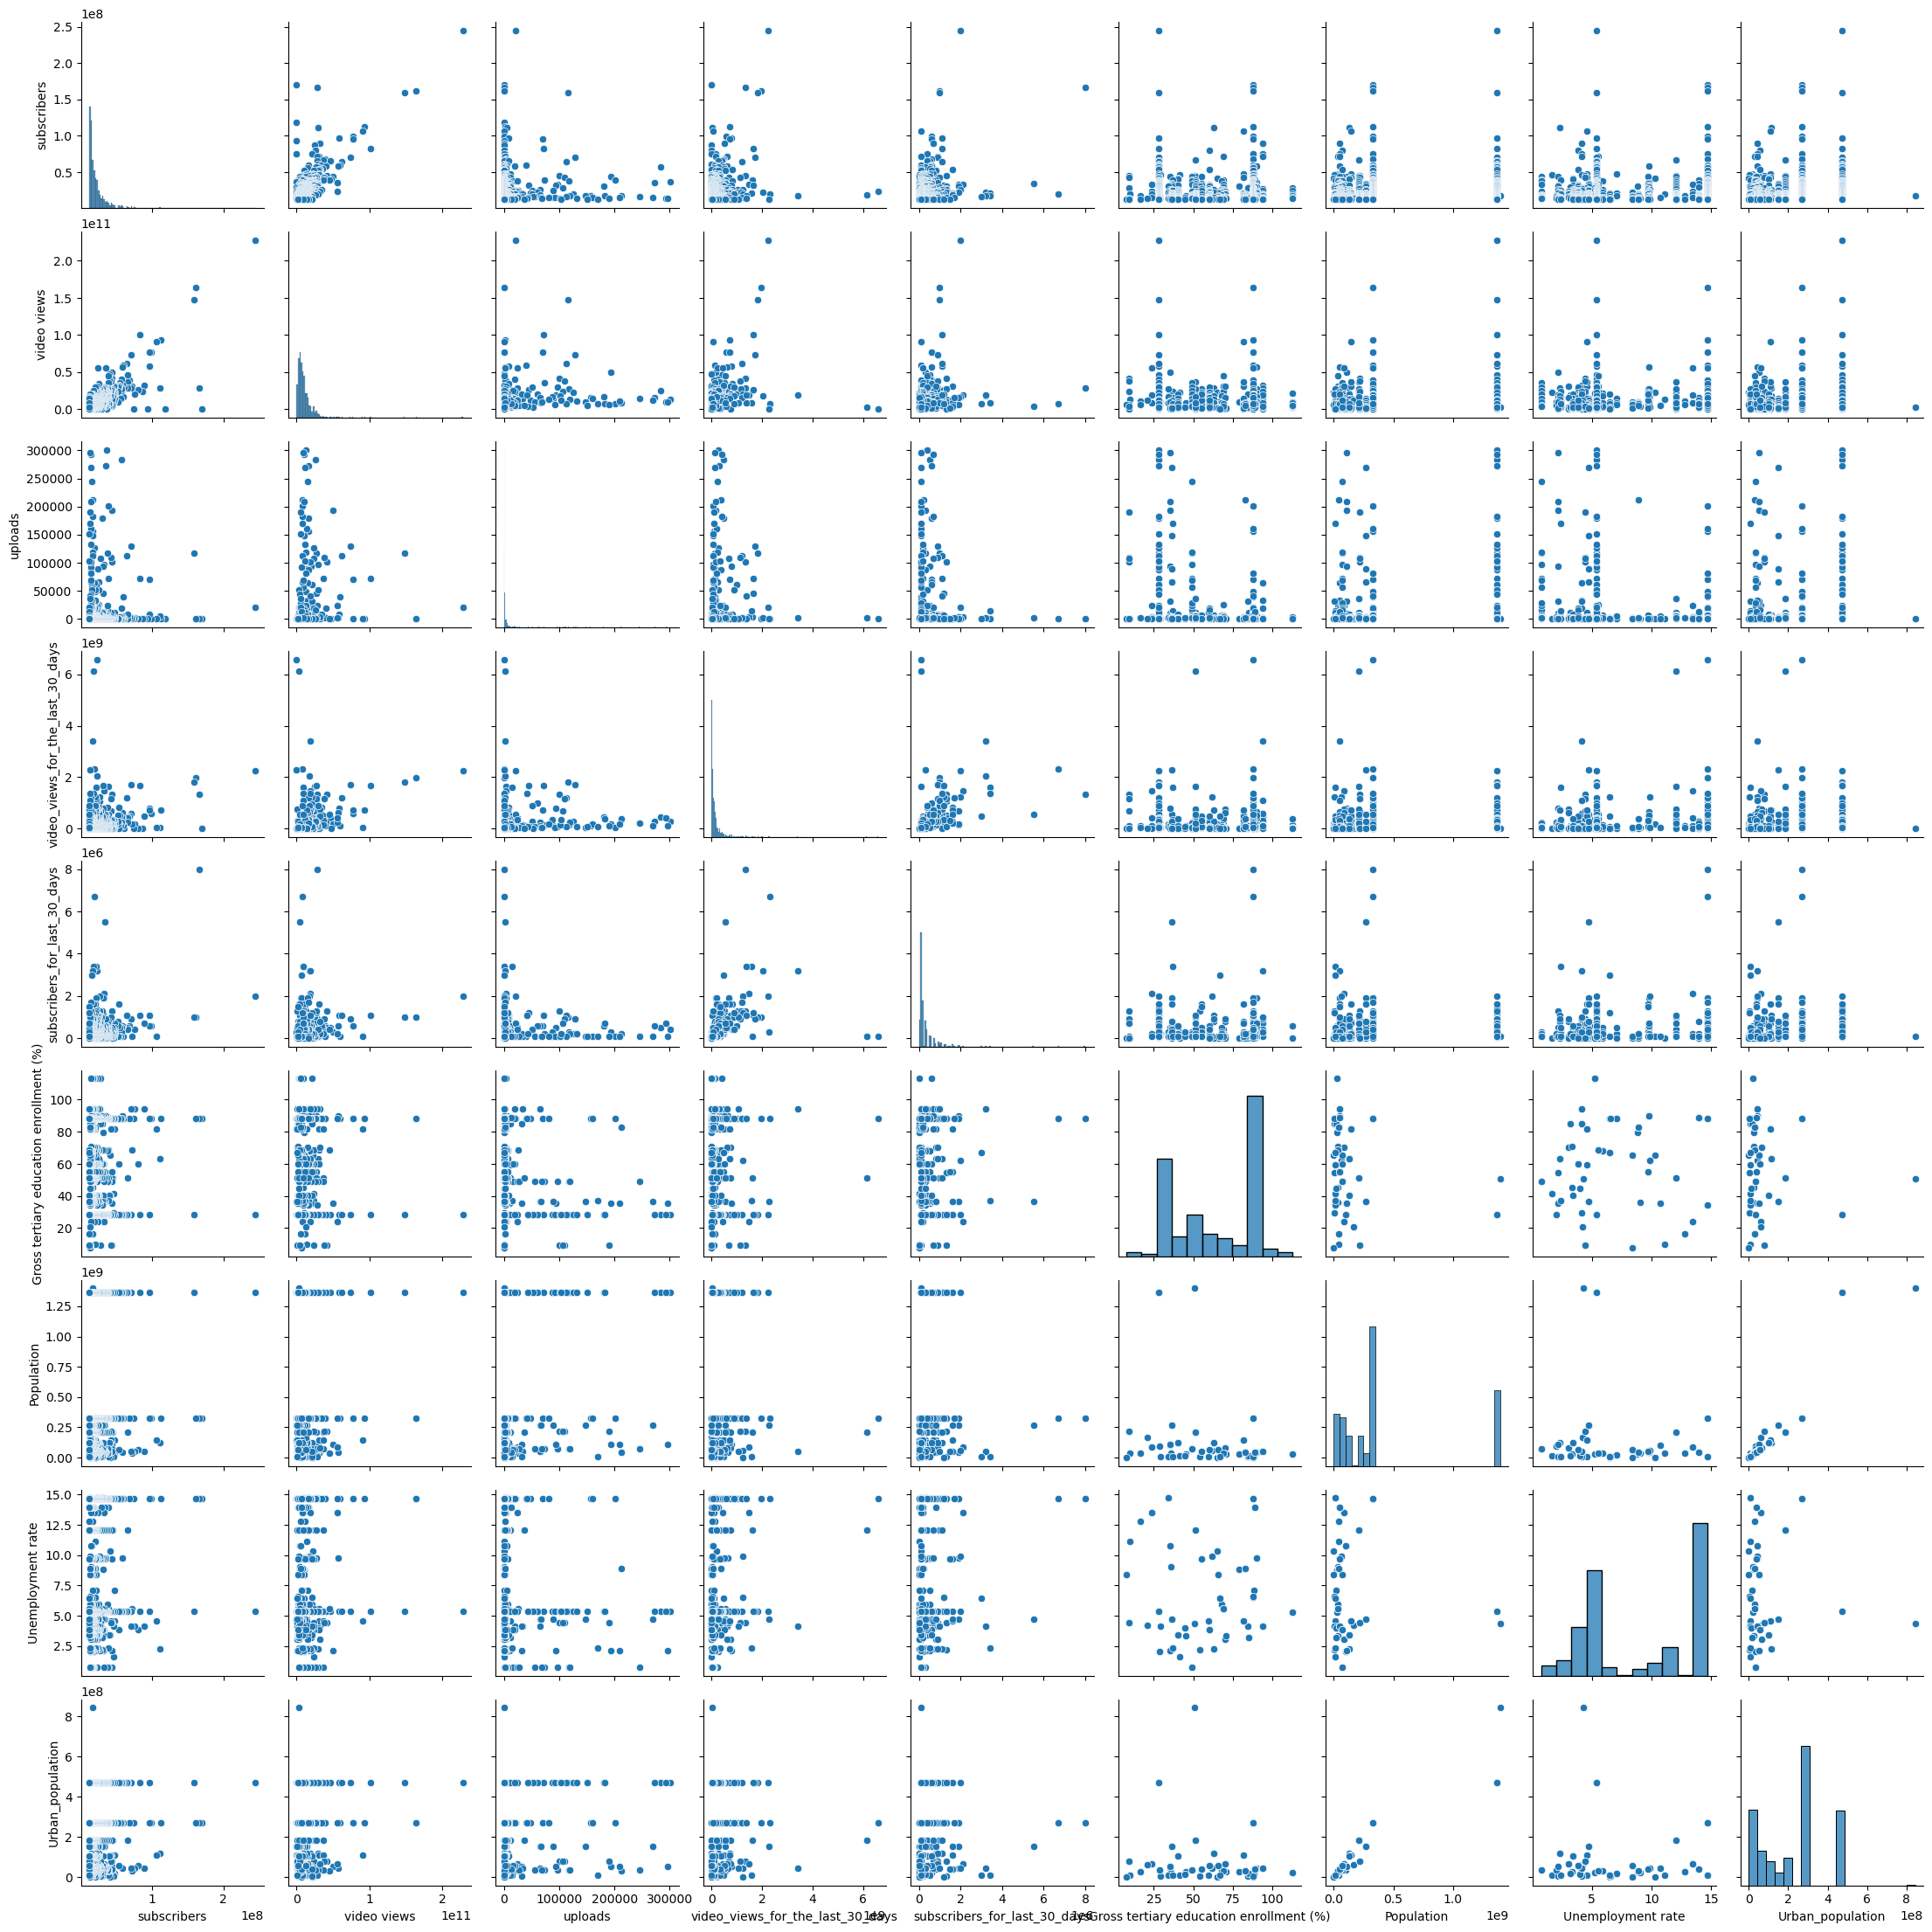

In [160]:
# Определим важные признаки для построения модели

data_heatmap = data[['Youtuber', 'subscribers', 'video views', 'category',
       'uploads', 'Country', 'video_views_for_the_last_30_days',
        'subscribers_for_last_30_days',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population']]

sns.pairplot(data_heatmap)

interval columns not set, guessing: ['subscribers', 'video views', 'uploads', 'video_views_for_the_last_30_days', 'subscribers_for_last_30_days', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population']


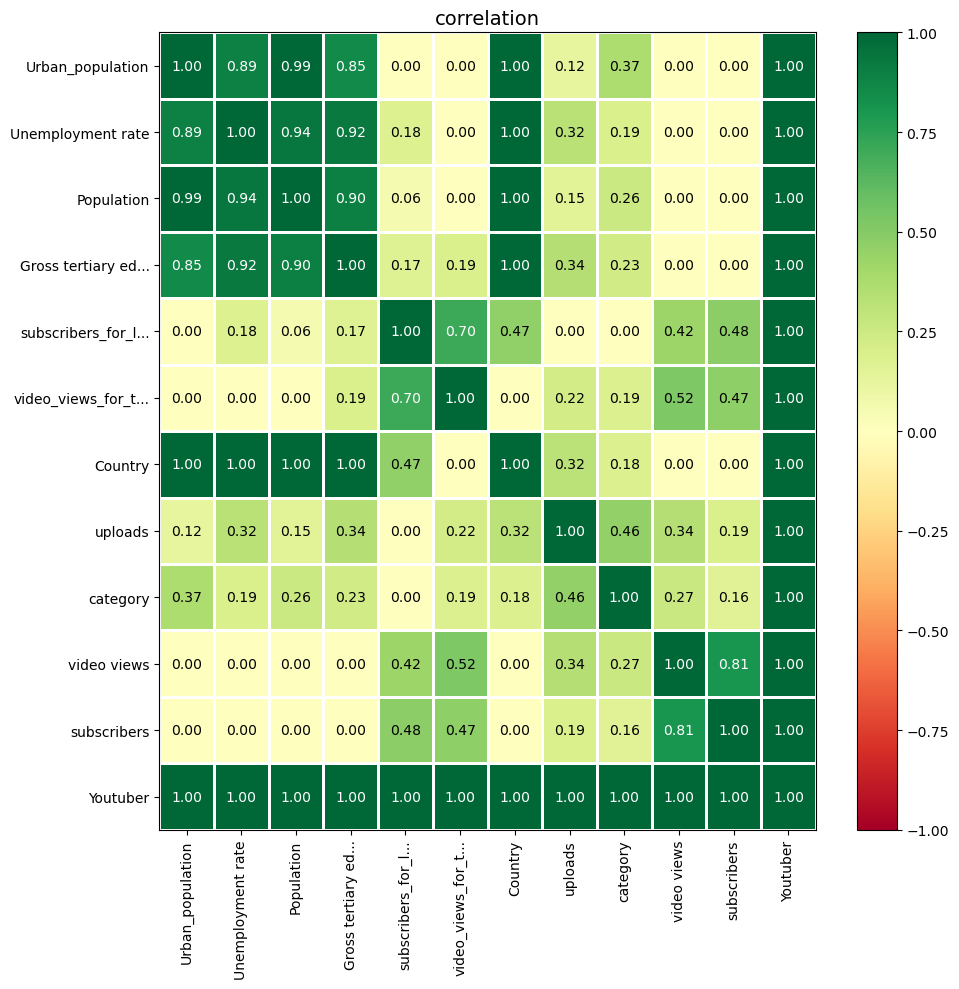

In [161]:
# Рассчитаем коэффициенты корреляции

!pip install phik
import phik
from phik.report import plot_correlation_matrix


phik_matrix = data_heatmap.phik_matrix()
plot_correlation_matrix(phik_matrix.values, x_labels=phik_matrix.columns, y_labels=phik_matrix.index, figsize=(10, 10))

interval columns not set, guessing: ['subscribers', 'video views', 'uploads', 'video_views_for_the_last_30_days', 'subscribers_for_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings']


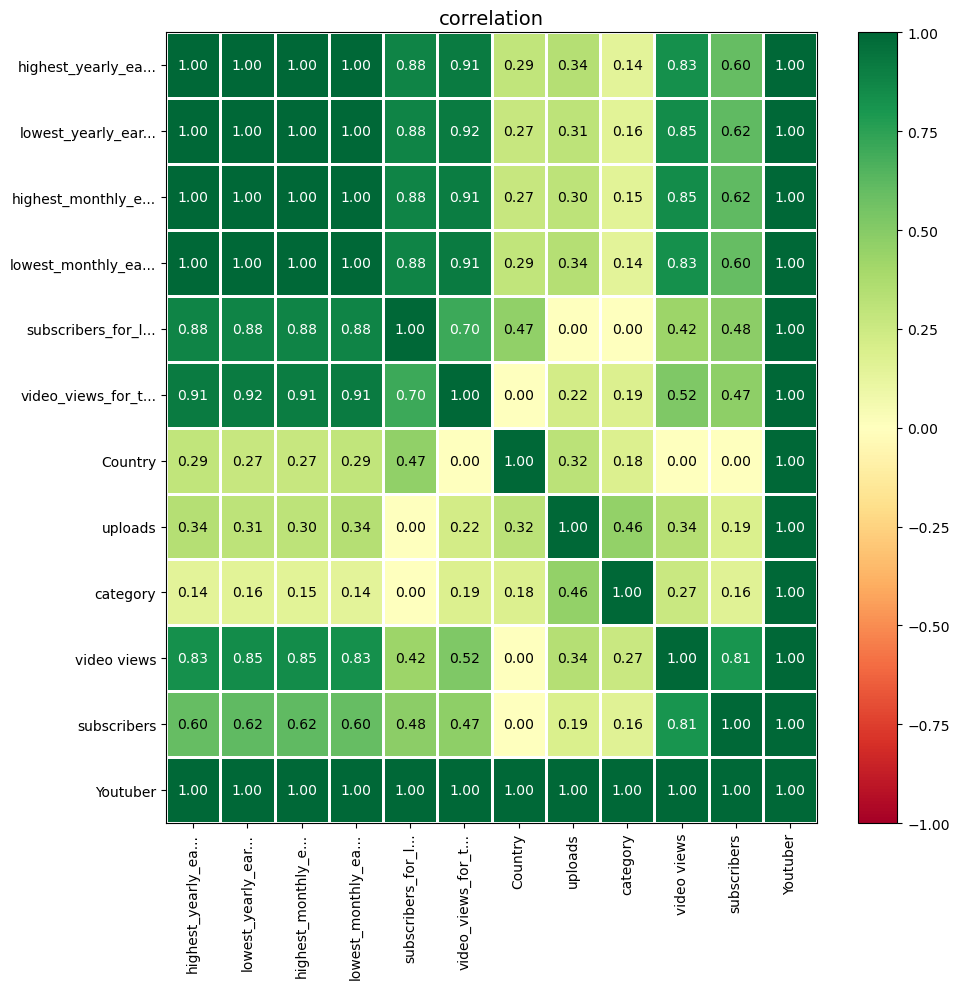

In [162]:
data_heatmap_add = data[['Youtuber', 'subscribers', 'video views', 'category',
       'uploads', 'Country', 'video_views_for_the_last_30_days', 'subscribers_for_last_30_days',
       'lowest_monthly_earnings', 'highest_monthly_earnings', 
        'lowest_yearly_earnings', 'highest_yearly_earnings']]

phik_matrix = data_heatmap_add.phik_matrix()
plot_correlation_matrix(phik_matrix.values, x_labels=phik_matrix.columns, y_labels=phik_matrix.index, figsize=(10, 10))

#### Согласно тепловой карте мы наблюдаем сильную взаимосвязь между численностью населения, уровнем высшего образования и уровнем безработицы в стране. Но ключевой показатель Подписчики сильно коррелирует с количеством просмотров, а также предполагаемым заработком.

### Задание 2. Корреляционный анализ

1. Оставьте два коррелирующих столбца: "subscribers" и"video views".
2. Отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
3. Рассчитайте коэффициент корреляции Пирсона.
4. Определите "video views" как признак Х, а "subscribers" - как целевую переменную.
5. Разделите выборку на тестовую и тренировочную.
6. Постройте модель линейной регрессии.
7. Рассчитайте точность модели на тестовой выборке.
* Как изменится точность, если опустить пункт 2 и не убирать из данных нулевые просмотры?

In [116]:
data_corr = data[['subscribers', 'video views']]
# data_corr = data_corr.drop(data_corr[data_corr['video views'] == 0].index)
data_corr.head()

,subscribers,video views
0,245000000,2.280000e+11
1,170000000,0.000000e+00
2,166000000,2.836884e+10
3,162000000,1.640000e+11
4,159000000,1.480000e+11


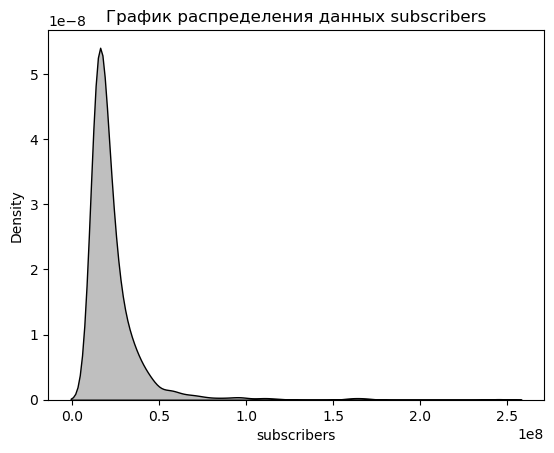

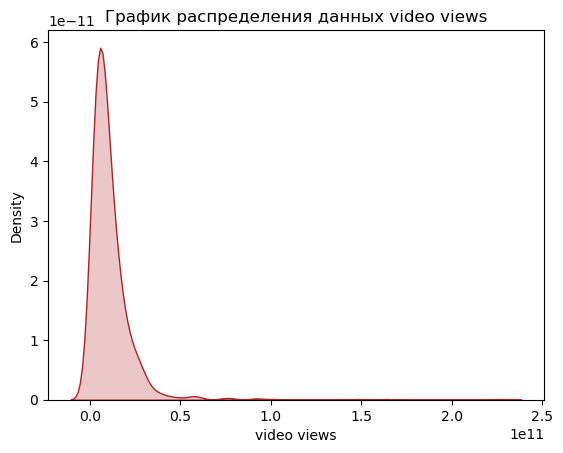

In [117]:
# Для расчета коэффициента корреляции проверим данные на нормальность

sns.kdeplot(data_corr['subscribers'], label="Subscribers", fill = True, color = '#000000')
plt.title('График распределения данных subscribers')
plt.show()

sns.kdeplot(data_corr['video views'], label="Video views", fill = True, color = '#B22222')
plt.title('График распределения данных video views')
plt.show()

In [118]:
import scipy.stats as st

stat, p = st.shapiro(data_corr['subscribers'])

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно, распределение нормальное')
else:
    print('Вероятно, распределение не нормальное')

stat = 0.523, p = 0.00000
Вероятно, распределение не нормальное


In [119]:
# В виду не нормального распределения будем использовать коэффициент корреляции Спирмана

data_corr[['subscribers', 'video views']].corr(method='spearman')

,subscribers,video views
subscribers,1.000000,0.555068
video views,0.555068,1.000000


In [120]:
# Однако, коэффициент Пирсона дает более высокий результат

data_corr[['subscribers', 'video views']].corr()

,subscribers,video views
subscribers,1.000000,0.750958
video views,0.750958,1.000000


In [122]:
# Определите "video views" как признак Х, а "subscribers" - как целевую переменную.
# Построим модель линейной регрессии для выбранных признаков

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [123]:
X = data_corr[['video views']]
y = data_corr['subscribers']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [125]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [126]:
model.coef_

array([0.00093804])

In [127]:
model.intercept_

12749476.634675797

In [128]:
y_pred = model.predict(X_test)
y_pred

array([17988514.19595861, 19632081.18093378, 19443167.40531213,
       20566534.13731594, 26463185.59945403, 25060929.66190768,
       21726353.07833528, 27559459.92890062, 32661216.61540436,
       21929702.00786394, 21274918.3420479 , 24283285.59769564,
       20215129.13746749, 17222402.54100081, 35154415.50422447,
       22404612.76784037, 19555758.00389792, 30290037.54758343,
       16990897.33841689, 36744401.10320017, 22151044.28256072,
       16928371.01512699, 16535164.1053398 , 29267371.99691219,
       21932071.81309507, 23122378.27423489, 27856645.52869099,
       20515520.34432025, 17868556.21014897, 37889602.04740541,
       26645792.75155882, 17085646.40247685, 22354860.8366702 ,
       15848383.72624376, 32304848.37523581, 14781165.66462776,
       21401528.14099772, 22072486.99445754, 14333912.50116212,
       27337953.16125032, 16759328.15770023, 17740308.55073925,
       21176918.43109525, 18297117.17118739, 19932216.1422511 ,
       47246475.60866614, 44109870.61245

In [129]:
y_test

920    12900000
525    17200000
567    16400000
657    15200000
633    15500000
         ...   
538    16900000
521    17300000
522    17300000
388    20200000
774    14200000
Name: subscribers, Length: 299, dtype: int64

In [107]:
# Проверим коэффициент детерминации
model.score(X_test, y_test)

0.6631544237913568

In [130]:
# Проверим коэффициент детерминации на данных с нулевыми просмотрами
model.score(X_test, y_test)

0.3401071411772094

In [108]:
# Получение предсказанных значений
y_pred = model.predict(X)

In [109]:
# Вычисление остатков
residuals = y - y_pred

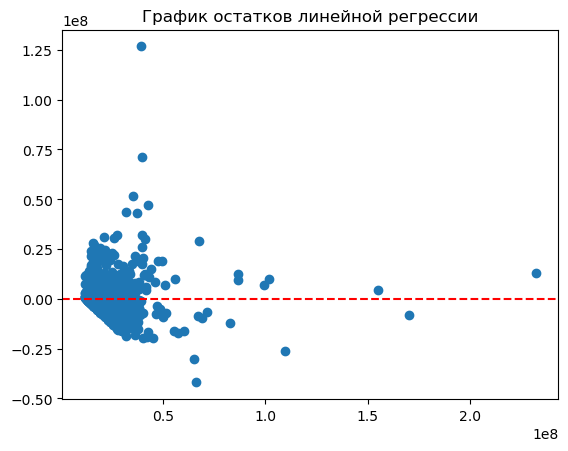

In [111]:
# Построение графика остатков
plt.scatter(y_pred, residuals)
plt_xlabel = "Предсказанные значения"
plt_ylabel = "Остатки"
plt.title("График остатков линейной регрессии")
plt.axhline(y=0, c='red', linestyle='--')
plt.show()

#### По графику остатков факт гетероскедастичной модели - модель нам не подходит либо нужно работать с преобразованием переменных.

#### Точность значимо ухудшится, если не убирать из данных нулевые просмотры - снижение score с 66% до 34%.

### Задание 3. Классификация

1. Определите две самые популярные категории канала и отфильтруйте по ним набор данных.
2. В качестве признаков используйте следующие столбцы: [‘video views’, ‘subscribers’, ‘uploads’]
3. Снова отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
4. Для целевой переменной используйте столбец'category'. Значения по нему закодируйте с помощью LabelEncoder.
5. Разделите выборку на тестовую и тренировочную, укажите random_state=13.`
6. Постройте модель логистической регрессии.
7. Рассчитайте точность модели на тестовой выборке.
* Изменится ли точность модели, если в качестве признаков выбрать другие столбцы?

In [164]:
data_top_category = data.groupby(['category'])['video views'].sum().reset_index().sort_values(by='video views', ascending=False).head(2)
data_top_category

,category,video views
8,Music,3.121478e+12
3,Entertainment,2.527739e+12


In [165]:
top_category = list(data_top_category['category'].values)
top_category

['Music', 'Entertainment']

In [134]:
data_class = data[['category', 'video views', 'subscribers', 'uploads']]
data_class = data_class[(data_class['category'].isin(top_category))]
data_class = data_class.drop(data_class[data_class['video views'] == 0].index)
data_class.head()

,category,video views,subscribers,uploads
0,Music,2.280000e+11,245000000,20082
2,Entertainment,2.836884e+10,166000000,741
9,Entertainment,7.718017e+10,98900000,574
10,Music,5.785629e+10,96700000,8548
17,Music,2.082699e+10,75600000,2281


In [135]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [136]:
# Закодируем значения по столбцу category 

data_categories = le.fit_transform(data_class['category'])
le.classes_

array(['Entertainment', 'Music'], dtype=object)

In [138]:
data_class = data_class.loc[:, data_class.columns != 'category']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(data_class, data_categories, test_size=0.30, random_state=13)

In [141]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [142]:
model.coef_

array([0.00093804])

In [143]:
model.intercept_

12749476.634675797

In [145]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0])

In [146]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0])

In [148]:
# Проверим коэффициент детерминации
lr.score(X_test, y_test)

0.6015037593984962

In [166]:
# Уберем из набора данных показатель количества видео, загруженных на канал
# И добавим предполанаемые показатели ежегодного дохода 

data_class = data[['category', 'video views', 'subscribers', 'lowest_yearly_earnings', 'highest_yearly_earnings']]
data_class = data_class[(data_class['category'].isin(top_category))]
data_class = data_class.drop(data_class[data_class['video views'] == 0].index)
data_class.head()

,category,video views,subscribers,lowest_yearly_earnings,highest_yearly_earnings
0,Music,2.280000e+11,245000000,6800000.0,108400000.0
2,Entertainment,2.836884e+10,166000000,4000000.0,64700000.0
9,Entertainment,7.718017e+10,98900000,1700000.0,27900000.0
10,Music,5.785629e+10,96700000,2400000.0,38600000.0
17,Music,2.082699e+10,75600000,504900.0,8100000.0


In [167]:
data_categories = le.fit_transform(data_class['category'])
le.classes_
data_class = data_class.loc[:, data_class.columns != 'category']
X_train, X_test, y_train, y_test = train_test_split(data_class, data_categories, test_size=0.30, random_state=13)

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6616541353383458

#### В данном случае видим улучшение коэффициента score на 6%.